In [3]:
from sqlalchemy import create_engine    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # General visualisations
import matplotlib.ticker as mtick # Axis visuals
import seaborn as sns
import geopandas as gpd

In [6]:

engine= create_engine('sqlite:///gorkha.db')
df=pd.read_sql(
'''
SELECT 
a.building_id
,c.ward_id
,c.vdcmun_id
,c.vdcmun_name
,c.district_id
,c.district_name
,count_floors_pre_eq
,age_building
,plinth_area_sq_ft
,height_ft_pre_eq
,land_surface_condition
,foundation_type
,roof_type
,ground_floor_type
,other_floor_type
,position
,plan_configuration
,has_superstructure_adobe_mud
,has_superstructure_mud_mortar_stone
,has_superstructure_stone_flag
,has_superstructure_cement_mortar_stone
,has_superstructure_mud_mortar_brick
,has_superstructure_cement_mortar_brick
,has_superstructure_timber
,has_superstructure_bamboo
,has_superstructure_rc_non_engineered
,has_superstructure_rc_engineered
,has_superstructure_other
,count_families
,has_secondary_use
,has_secondary_use_agriculture
,has_secondary_use_hotel
,has_secondary_use_rental
,has_secondary_use_institution
,has_secondary_use_school
,has_secondary_use_industry
,has_secondary_use_health_post
,has_secondary_use_gov_office
,has_secondary_use_use_police
,has_secondary_use_other
,damage_grade
,technical_solution_proposed

from building_structure a 
inner join building_ownership_and_use b on a.building_id = b.building_id
inner join ward_district_name_mapping c on a.ward_id = c.ward_id
'''
,engine)

In [10]:
df.head()

,building_id,ward_id,vdcmun_id,vdcmun_name,district_id,district_name,count_floors_pre_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,technical_solution_proposed
0,120101000011,120703,1207,Siddhicharan Municipality,12,Okhaldhunga,1,9,288,9,...,0,0,0,0,0,0,0,0,Grade 3,Major repair
1,120101000021,120703,1207,Siddhicharan Municipality,12,Okhaldhunga,1,15,364,9,...,0,0,0,0,0,0,0,0,Grade 5,Reconstruction
2,120101000031,120703,1207,Siddhicharan Municipality,12,Okhaldhunga,1,20,384,9,...,0,0,0,0,0,0,0,0,Grade 2,Minor repair
3,120101000041,120703,1207,Siddhicharan Municipality,12,Okhaldhunga,1,20,312,9,...,0,0,0,0,0,0,0,0,Grade 2,Minor repair
4,120101000051,120703,1207,Siddhicharan Municipality,12,Okhaldhunga,1,30,308,9,...,0,0,0,0,0,0,0,0,Grade 1,Minor repair


In [42]:
df.dtypes

building_id                                 int64
ward_id                                     int64
vdcmun_id                                   int64
vdcmun_name                                object
district_id                                 int64
district_name                              object
count_floors_pre_eq                         int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64


In [4]:
#df.to_pickle ('../data/df')
df=pd.read_pickle('../data/df')

In [11]:
df.shape

(762106, 42)

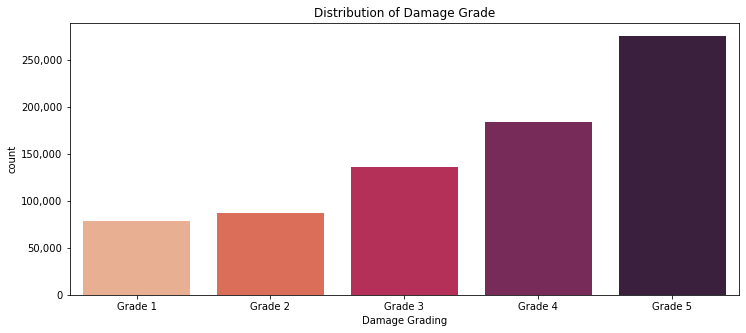

In [65]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='damage_grade', data=df, order = ['Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'], palette= 'rocket_r')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of Damage Grade")
plt.xlabel("Damage Grading")
plt.show()

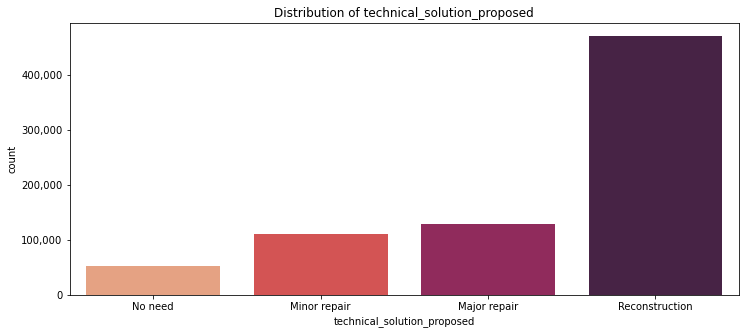

In [19]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='technical_solution_proposed', data=df, order = ['No need', 'Minor repair', 'Major repair','Reconstruction'], palette= 'rocket_r')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Distribution of technical_solution_proposed")
plt.xlabel("technical_solution_proposed")
plt.show()

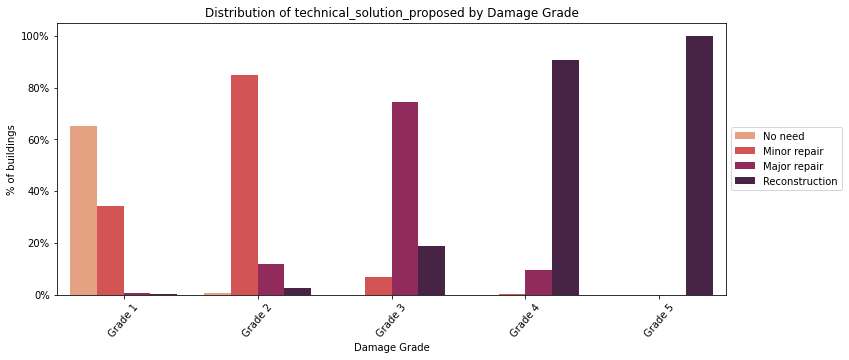

In [18]:
df_temp = df.groupby(['damage_grade','technical_solution_proposed']).size().reset_index(name='count')
# Set Index
df_temp = df_temp.set_index(['damage_grade','technical_solution_proposed'])
# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
# Plot char
plt.figure(figsize=(12,5))
hue_order = ['No need', 'Minor repair', 'Major repair','Reconstruction']
ax = sns.barplot(data = df_temp, 
                 x = 'damage_grade', 
                 y = 'count', 
                 hue = 'technical_solution_proposed',
                 hue_order=hue_order,
                 palette='rocket_r')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of "+'technical_solution_proposed'+" by Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("% of buildings")
plt.show()


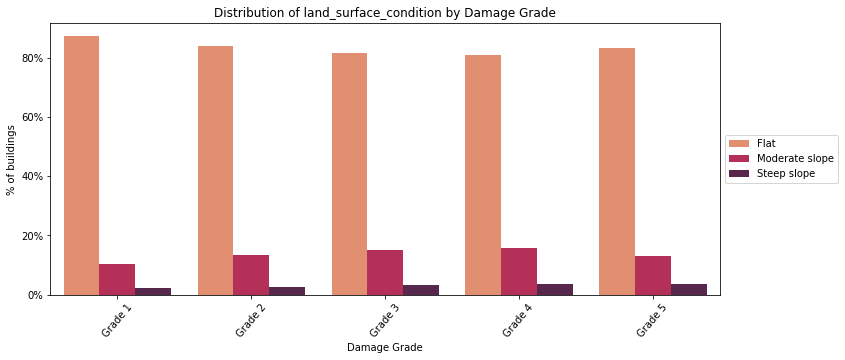

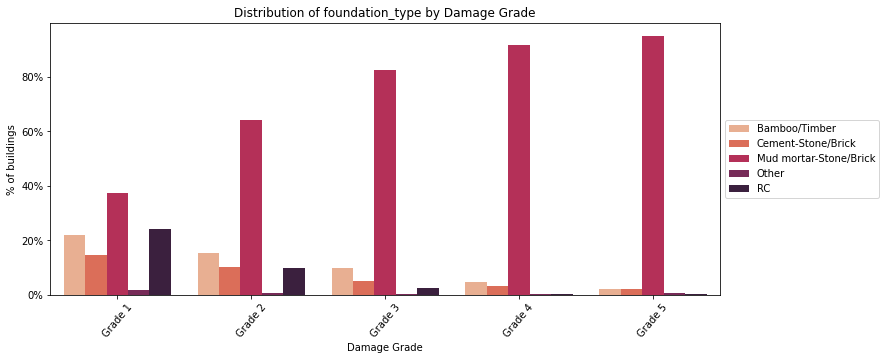

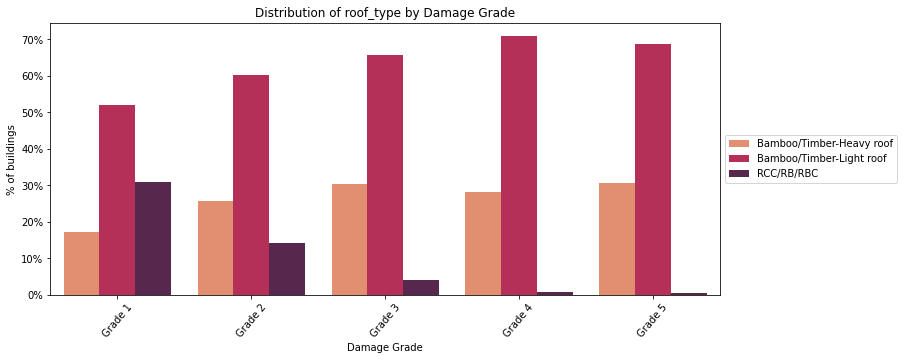

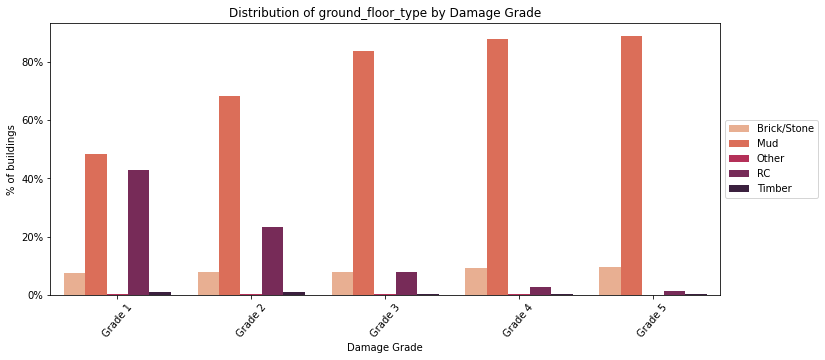

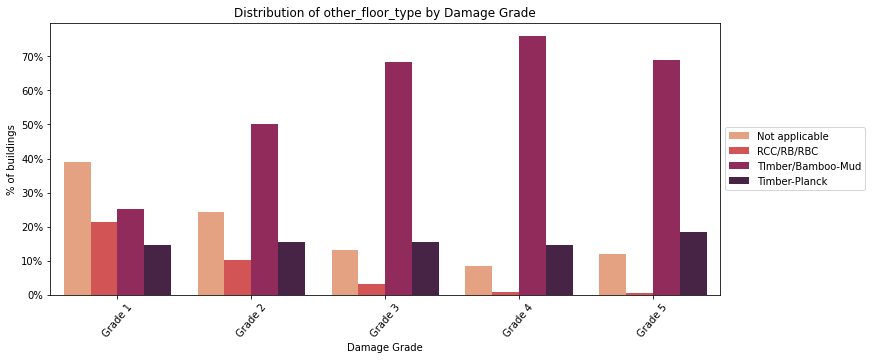

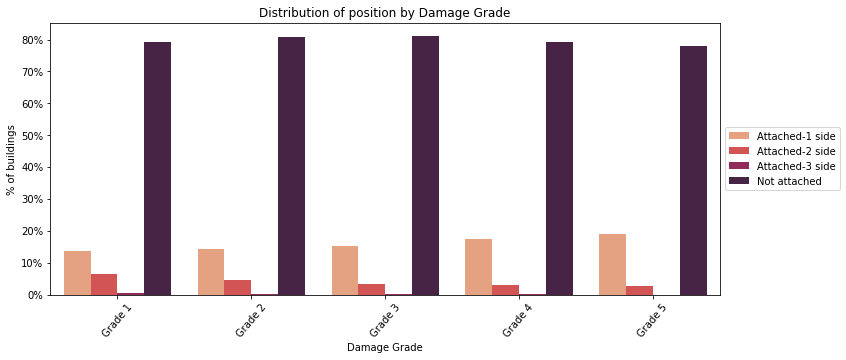

In [159]:
# used: https://www.kaggle.com/code/ar89dsl/predicting-building-damage-from-earthquakes/notebook for vizualizations

v_list=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position']
for i in v_list:
    df_temp = df.groupby(['damage_grade',i]).size().reset_index(name='count')
    # Set Index
    df_temp = df_temp.set_index(['damage_grade',i])

    # Calculate Proportion of grade
    df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

    # Plot char
    plt.figure(figsize=(12,5))
    #hue_order = ['No need', 'Minor repair', 'Major repair','Reconstruction']
    ax = sns.barplot(data = df_temp, 
                     x = 'damage_grade', 
                     y = 'count', 
                     hue = i,
                     #hue_order=hue_order,
                     palette='rocket_r')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.xticks(rotation = 50)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.title("Distribution of "+i+" by Damage Grade")
    plt.xlabel("Damage Grade")
    plt.ylabel("% of buildings")
    plt.show()

    # Clean up
    del df_temp, ax


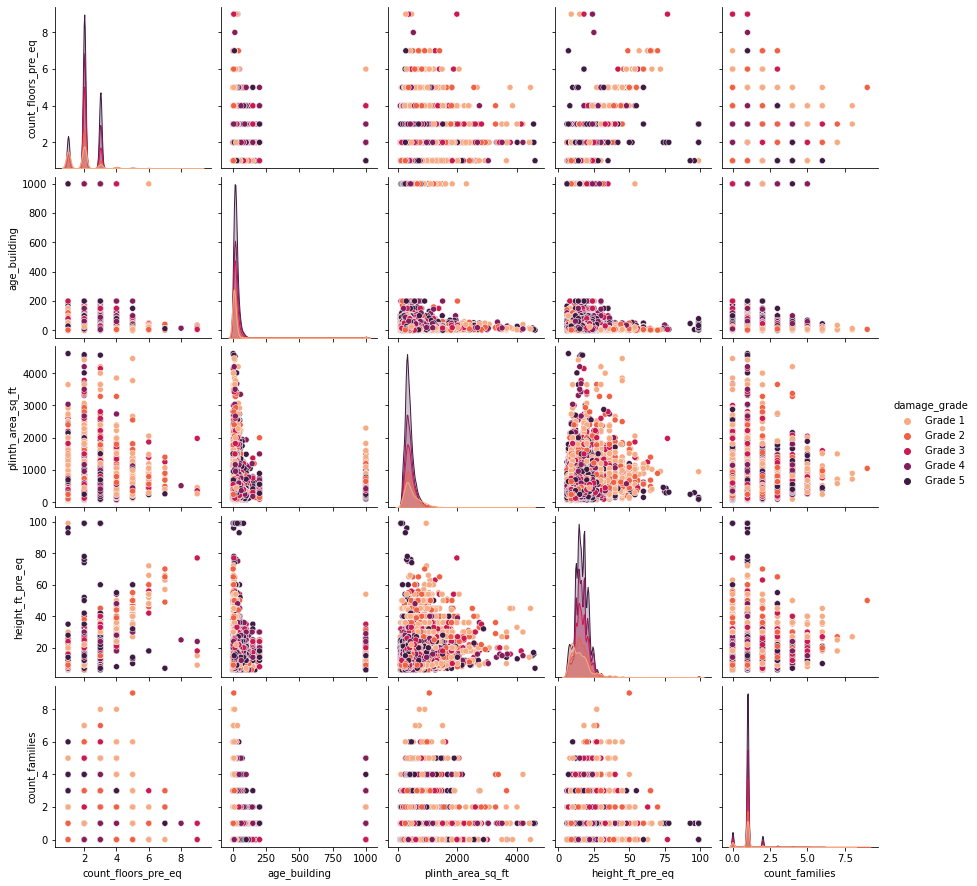

In [4]:
sns.pairplot(df[['count_floors_pre_eq', 'age_building', 'plinth_area_sq_ft','height_ft_pre_eq','count_families','damage_grade']].sample(100000),
            hue='damage_grade',
            hue_order=['Grade 1','Grade 2','Grade 3','Grade 4','Grade 5'],
            palette='rocket_r')

In [7]:
df.groupby(['age_building']).size()

age_building
0       4732
1      19385
2      21643
3      24431
4      23404
       ...  
195        2
196        2
199        1
200      260
999     3145
Length: 176, dtype: int64

In [8]:
#proportion of 'age_building' rows coded as 999
3134/len(df)

0.004112288841709683

## Mapping

In [200]:
district_summary=pd.DataFrame({'buildings' : df.groupby( ["district_name","damage_grade"] ).size()}).reset_index()
district_summary

,district_name,damage_grade,buildings
0,Dhading,Grade 1,4952
1,Dhading,Grade 2,7526
2,Dhading,Grade 3,15218
3,Dhading,Grade 4,26080
4,Dhading,Grade 5,35346
5,Dolakha,Grade 1,1353
6,Dolakha,Grade 2,2993
7,Dolakha,Grade 3,6520
8,Dolakha,Grade 4,14409
9,Dolakha,Grade 5,35364


In [202]:
Grade5=district_summary.loc[district_summary['damage_grade'] =='Grade 5'] 
Grade5

,district_name,damage_grade,buildings
4,Dhading,Grade 5,35346
9,Dolakha,Grade 5,35364
14,Gorkha,Grade 5,27125
19,Kavrepalanchok,Grade 5,23859
24,Makwanpur,Grade 5,7866
29,Nuwakot,Grade 5,40295
34,Okhaldhunga,Grade 5,5620
39,Ramechhap,Grade 5,11490
44,Rasuwa,Grade 5,9178
49,Sindhuli,Grade 5,8191


In [199]:
ward_district=pd.DataFrame({'buildings' : df.groupby( ["district_name"] ).size()}).reset_index()
ward_district

,district_name,buildings
0,Dhading,89122
1,Dolakha,60639
2,Gorkha,78074
3,Kavrepalanchok,98019
4,Makwanpur,90994
5,Nuwakot,77148
6,Okhaldhunga,39352
7,Ramechhap,58623
8,Rasuwa,12644
9,Sindhuli,68750


In [174]:
#set shapefile to district agg level
gdf_districts = gpd.read_file('data/shape_files_of_districts_in_nepal/shape_files_of_districts_in_nepal.shp').to_crs(epsg=4087)


In [175]:
gdf_districts['centroid']=gdf_districts.centroid

In [203]:
#merge shapefile and data
gdf_merged= gdf_districts.merge(Grade5, how='outer',left_on=['dist_name'],right_on=['district_name'])

In [204]:
gdf_merged['buildings'] = gdf_merged['buildings'].replace(np.nan, 0)
gdf_merged.sort_values(by='buildings',ascending=False).head(12)

,descriptio,name,objectid,dist_code,dist_name,shape_area,shape_len,cartodb_id,created_at,updated_at,geometry,centroid,district_name,damage_grade,buildings
51,None,None,37,23,Sindhupalchok,0.227508,2.317640,37,2015-02-21,2015-02-21,"POLYGON ((9511234.921 3126344.558, 9511882.800...",POINT (9544261.674 3107359.840),Sindhupalchok,Grade 5,71432.0
32,None,None,42,29,Nuwakot,0.107319,1.688363,42,2015-02-21,2015-02-21,"POLYGON ((9475931.725 3126531.241, 9476652.742...",POINT (9488432.015 3107415.549),Nuwakot,Grade 5,40295.0
17,None,None,38,17,Dolakha,0.198498,2.817363,38,2015-02-21,2015-02-21,"POLYGON ((9630838.808 3112188.504, 9630900.034...",POINT (9595153.713 3092881.056),Dolakha,Grade 5,35364.0
56,None,None,32,30,Dhading,0.174630,2.853759,32,2015-02-21,2015-02-21,"POLYGON ((9473944.561 3155315.344, 9474234.103...",POINT (9457918.162 3111461.838),Dhading,Grade 5,35346.0
22,None,None,22,36,Gorkha,0.334053,3.639555,22,2015-02-21,2015-02-21,"POLYGON ((9405469.159 3198998.671, 9406961.954...",POINT (9438847.479 3152521.335),Gorkha,Grade 5,27125.0
40,None,None,52,24,Kavrepalanchok,0.130585,1.812263,52,2015-02-21,2015-02-21,"POLYGON ((9517575.233 3091832.399, 9518365.825...",POINT (9530966.898 3065657.018),Kavrepalanchok,Grade 5,23859.0
39,None,None,49,18,Ramechhap,0.133972,2.579811,49,2015-02-21,2015-02-21,"POLYGON ((9613053.404 3064370.883, 9612695.067...",POINT (9592453.220 3062204.803),Ramechhap,Grade 5,11490.0
29,None,None,30,28,Rasuwa,0.139254,2.321852,30,2015-02-21,2015-02-21,"POLYGON ((9475463.738 3154297.550, 9475751.610...",POINT (9507891.944 3137318.168),Rasuwa,Grade 5,9178.0
43,None,None,59,19,Sindhuli,0.227359,2.988794,59,2015-02-21,2015-02-21,"POLYGON ((9553096.058 3055819.208, 9553454.507...",POINT (9567192.562 3028093.246),Sindhuli,Grade 5,8191.0
41,None,None,54,34,Makwanpur,0.220191,2.706255,54,2015-02-21,2015-02-21,"POLYGON ((9482927.933 3081271.408, 9483253.208...",POINT (9470994.584 3057938.861),Makwanpur,Grade 5,7866.0


(8865595.020801594, 9863899.731690474, 2910343.8472189587, 3412013.6818157393)

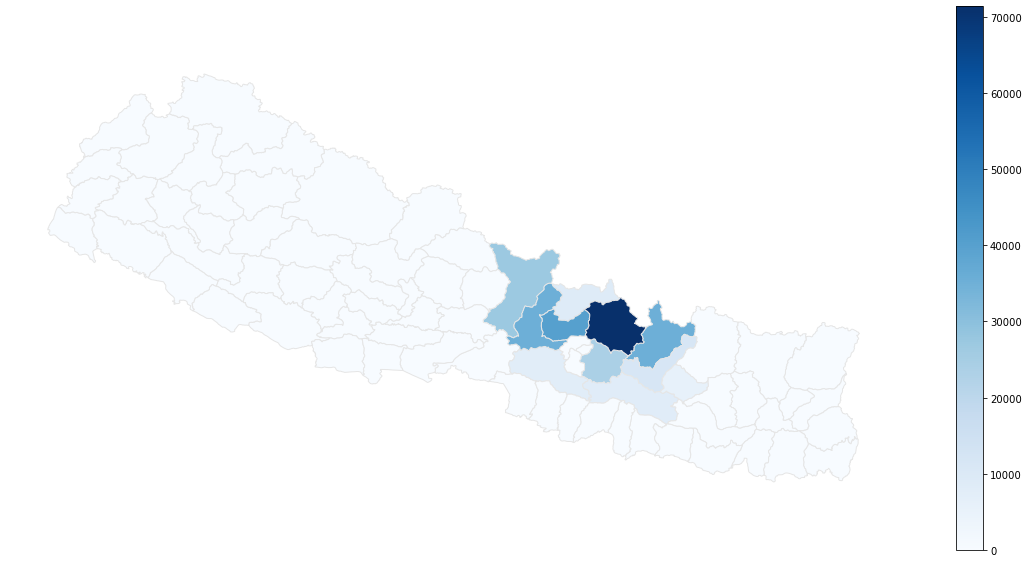

In [205]:
fig, ax = plt.subplots(1, figsize=(20,10))
gdf_merged.plot(column='buildings', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

(9385163.125954641, 9662232.039731339, 2986210.3288482884, 3210879.8224747013)

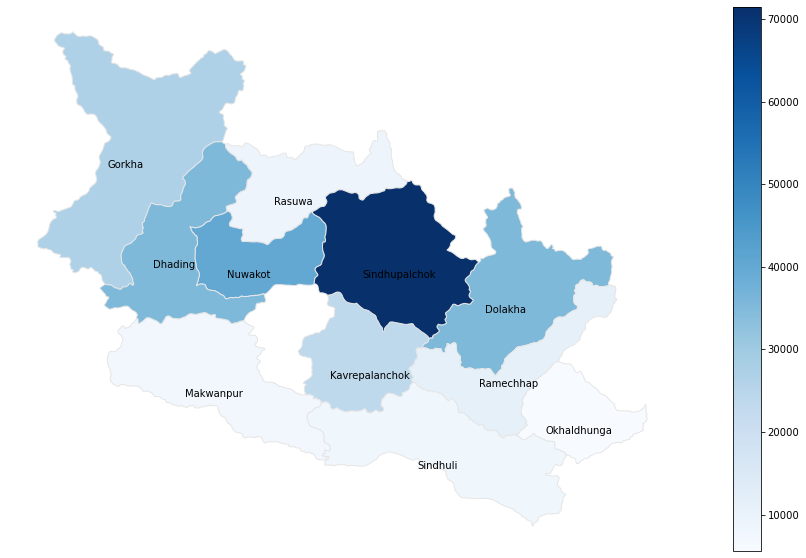

In [221]:
gdf_zoom= gdf_districts.merge(Grade5, how='inner',left_on=['dist_name'],right_on=['district_name'])
fig, ax = plt.subplots(1, figsize=(20,10))
gdf_zoom.plot(column='buildings', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)

for x,y,label in zip(gdf_zoom.centroid.x, gdf_zoom.centroid.y,gdf_zoom.dist_name):
    ax.annotate(label, xy=(x, y), xytext=(-30,-20), textcoords="offset points")
    
ax.axis('off')

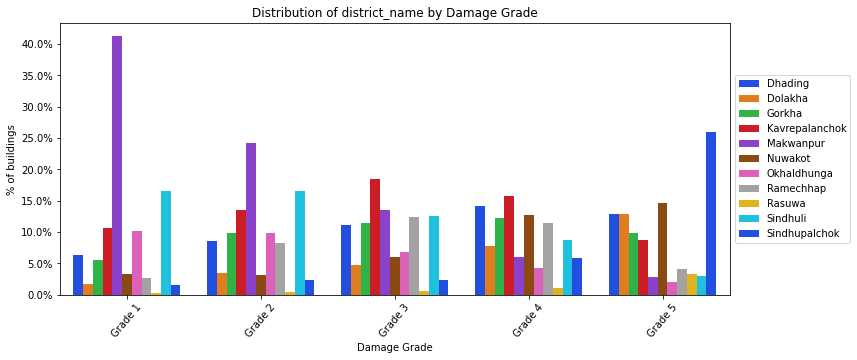

In [166]:
df_temp = df.groupby(['damage_grade','district_name']).size().reset_index(name='count')
# Set Index
df_temp = df_temp.set_index(['damage_grade','district_name'])
# Calculate Proportion of grade
df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
# Plot char
plt.figure(figsize=(12,5))

ax = sns.barplot(data = df_temp, 
                 x = 'damage_grade', 
                 y = 'count', 
                 hue = 'district_name',
                 palette='bright')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation = 50)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title("Distribution of "+'district_name'+" by Damage Grade")
plt.xlabel("Damage Grade")
plt.ylabel("% of buildings")
plt.show()
